### **Homestays Data analysis and Price Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!jupyter trust Cerina_Task.ipynb

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/Homestays_Data.xlsx")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

In [ ]:
df.describe()

,id,log_price,accommodates,bathrooms,first_review,host_response_rate,host_since,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,58247,55812.000000,73923,58284,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,2016-01-14 08:11:51.013442560,0.943520,2014-07-21 01:55:09.849437696,2017-03-14 19:27:18.789376,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
min,3.440000e+02,0.000000,1.000000,0.000000,2008-11-17 00:00:00,0.000000,2008-03-03 00:00:00,2009-01-21 00:00:00,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,2015-06-28 00:00:00,1.000000,2013-04-21 00:00:00,2017-01-09 00:00:00,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,2016-05-25 00:00:00,1.000000,2014-09-28 00:00:00,2017-04-28 00:00:00,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,2017-01-02 00:00:00,1.000000,2015-12-22 00:00:00,2017-09-08 00:00:00,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,2017-10-05 00:00:00,1.000000,2017-10-04 00:00:00,2017-10-05 00:00:00,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000
std,6.081735e+06,0.717394,2.153589,0.582044,NaN,0.163418,NaN,NaN,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142


# **Data Preprocessing**

In [ ]:
# Filling the Null Values
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].median())
df["description"] = df["description"].fillna(method = "ffill")
df["first_review"] = df["first_review"].fillna(method = "bfill")
df["host_has_profile_pic"] = df["host_has_profile_pic"].replace({"t":True, "f":False}).fillna(method = "bfill")
df["host_identity_verified"] = df["host_identity_verified"].replace({"t":True, "f":False}).fillna(method = "bfill")
df["host_response_rate"] = df["host_has_profile_pic"].fillna(df["host_response_rate"].mean())
df["host_since"] = df["host_since"].fillna(method = "ffill")
df["instant_bookable"] = df["instant_bookable"].replace({"t":True, "f":False})
df["last_review"] = df["last_review"].fillna(method = "ffill")
df["name"] = df["name"].fillna("East Village Studio")
df["neighbourhood"] = df["neighbourhood"].fillna("Brooklyn Heights")
df["neighbourhood"] = df["neighbourhood"].fillna("Mill Basin")
df["review_scores_rating"] = df["review_scores_rating"].fillna(df["review_scores_rating"].mean())
df["thumbnail_url"] = df["thumbnail_url"].fillna(method = "ffill")
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median())
df["beds"] = df["beds"].fillna(df["beds"].median())

In [ ]:
# Cleaning the zipcode Column
import re

def clean_zipcode(zipcode):
    zip_regex = r'\b\d{5}\b'
    match = re.search(zip_regex, zipcode)
    if match:
        return match.group()
    else:
        return None


df['zipcode'] = df['zipcode'].astype(str).apply(clean_zipcode)
df["zipcode"] = df["zipcode"].fillna(method = "ffill").astype(int)

In [ ]:
# Cleaning the amenities Column
def clean_amenities(amenities):
    amenities_list = [amenity.strip('"') for amenity in amenities.strip('{}').split(',')]
    return ', '.join(amenities_list)

df['amenities'] = df['amenities'].apply(clean_amenities)

# **1. Feature Engineering**

In [ ]:
# 1) Host Experience
df["Host_Tenure"] = ((pd.to_datetime("today") - df["host_since"]).dt.days/365).round()

# 2) Number of Amenities
df["Amenities_Count"] = df["amenities"].apply(lambda x: len(x))

# 3) Day since Last Review
df["Days_Since_Last_Review"] = (pd.to_datetime("today") - df["last_review"]).dt.days

# **2. Exploratory Data Analysis (EDA)**

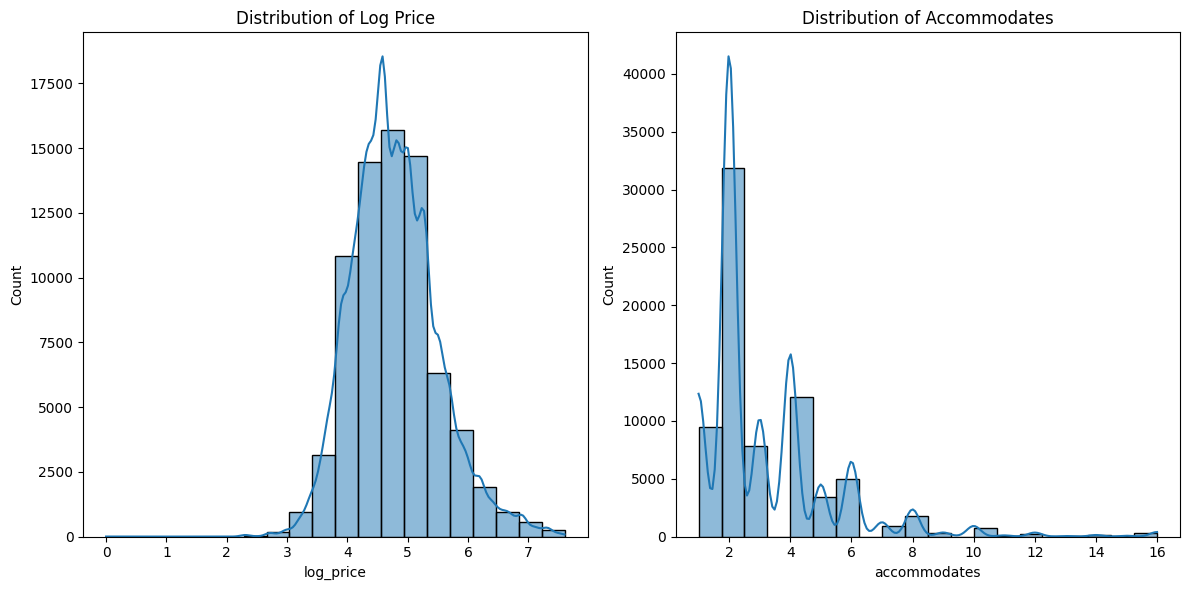

In [ ]:
# Distribution of Log price and Accommadates
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['log_price'], bins=20, kde=True)
plt.title('Distribution of Log Price')

plt.subplot(1, 2, 2)
sns.histplot(df['accommodates'], bins=20, kde=True)
plt.title('Distribution of Accommodates')

plt.tight_layout()
plt.show()

                        log_price  accommodates  bathrooms  cleaning_fee  \
log_price                1.000000      0.567574   0.355174      0.111191   
accommodates             0.567574      1.000000   0.505490      0.182306   
bathrooms                0.355174      0.505490   1.000000      0.054134   
cleaning_fee             0.111191      0.182306   0.054134      1.000000   
number_of_reviews       -0.032470      0.041964  -0.041521      0.110204   
Host_Tenure              0.077777     -0.007658  -0.007112      0.092013   
host_response_rate      -0.013171     -0.003970  -0.003146      0.022654   
host_identity_verified   0.024067      0.058233   0.014616      0.162100   
bedrooms                 0.473028      0.709214   0.589783      0.105491   
beds                     0.441953      0.810247   0.525699      0.132089   
review_scores_rating     0.074822     -0.015006   0.009162      0.028085   

                        number_of_reviews  Host_Tenure  host_response_rate  \
log_price

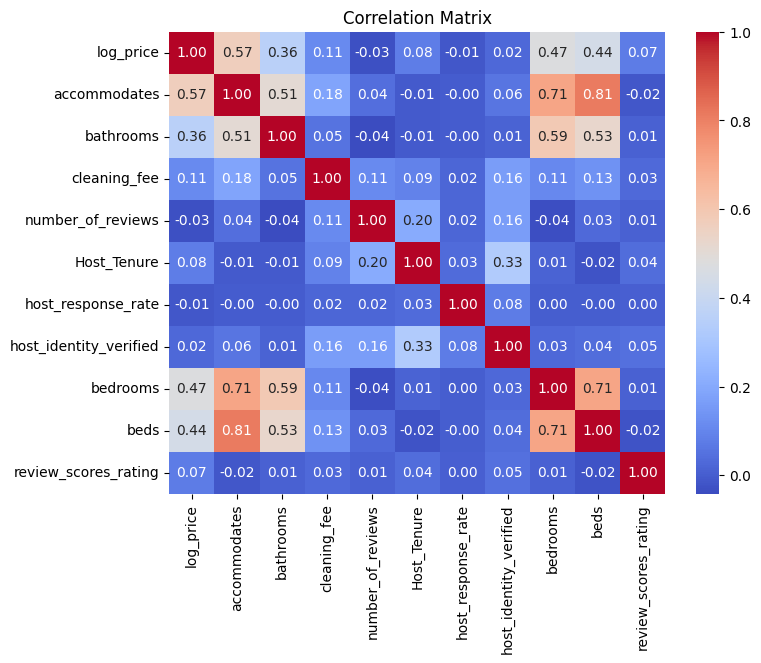

In [ ]:
# Correlation between Log price and other Numerical Features
correlation_matrix = df[["log_price", "accommodates", "bathrooms", "cleaning_fee", "number_of_reviews", "Host_Tenure", "host_response_rate", "host_identity_verified", "bedrooms", "beds", "review_scores_rating"]].corr()
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

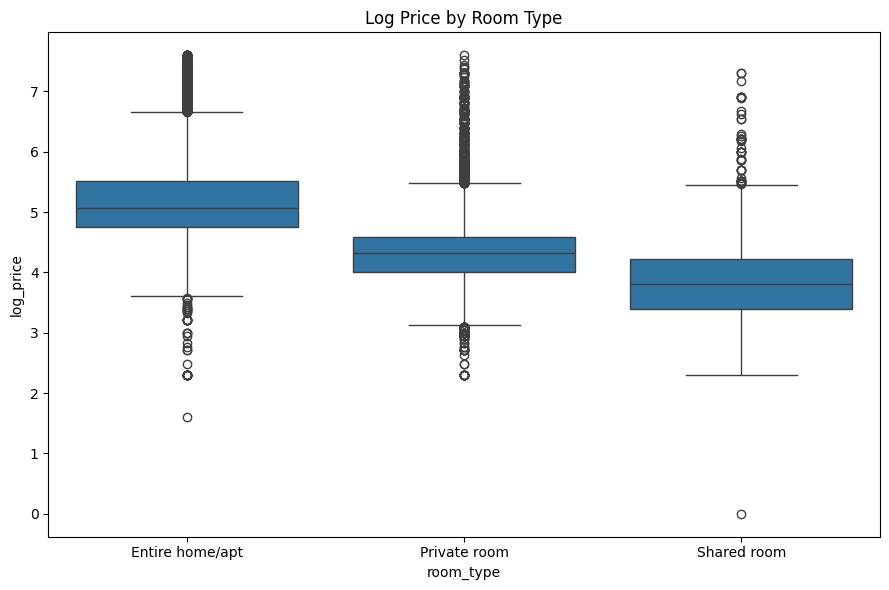

In [ ]:
# Quartile Distribuation of Log price with Room type
plt.figure(figsize=(9, 6))
sns.boxplot(x='room_type', y='log_price', data=df)
plt.title('Log Price by Room Type')
plt.tight_layout()
plt.show()

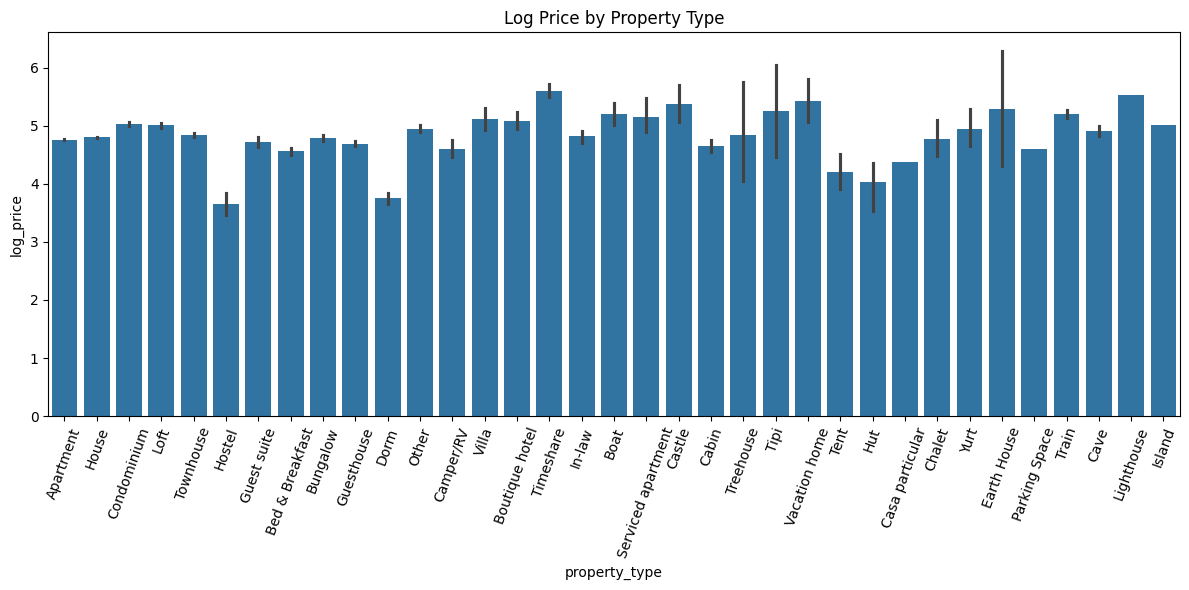

In [ ]:
# Price Distribuation of Log price with Property type
plt.figure(figsize=(12, 6))
sns.barplot(x='property_type', y='log_price', data=df)
plt.title('Log Price by Property Type')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

# **3. Geospatial Analysis**

In [ ]:
# Price Distribution Across Cities
plot_df = df[["latitude", "longitude", "log_price"]]

import folium
from folium.plugins import MarkerCluster

latitude_centre = plot_df["latitude"].mean()
longitude_centre = plot_df["longitude"].mean()

map = folium.Map(location = [latitude_centre, longitude_centre], zoom_start = 4)

for ind, row in plot_df.iterrows():
    location = [row['latitude'], row['longitude']]
    folium.Marker(location, popup = f'Price:{row["log_price"]}').add_to(map)

map

# **4. Sentiment Analysis on Textual Data**

In [ ]:
# Sentiment Score of Description
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def sentiment_score(text):
    scores = sia.polarity_scores(text)
    return scores['compound']

df['sentiment_score'] = df['description'].apply(sentiment_score)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# **5. Amenities Analysis**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import pearsonr, ttest_ind

mlb = MultiLabelBinarizer()
amenities_df = pd.DataFrame(mlb.fit_transform(df['amenities'].str.split(',')),
                            columns=mlb.classes_,
                            index=df.index)


df = pd.concat([df, amenities_df], axis=1)

In [ ]:
correlation_results = {}
for amenity in amenities_df.columns:
    correlation_coefficient, _ = pearsonr(df[amenity], df['log_price'])
    correlation_results[amenity] = correlation_coefficient
df["correlation_coeffiicent"] = correlation_coefficient
sorted_amenities = sorted(correlation_results.items(), key=lambda x: x[1], reverse=True)

In [ ]:
t_test_results = {}
for amenity in amenities_df.columns:
    has_amenity = df[df[amenity] == 1]['log_price']
    no_amenity = df[df[amenity] == 0]['log_price']
    t_statistic, p_value = ttest_ind(has_amenity, no_amenity)
    t_test_results[amenity] = (t_statistic, p_value)

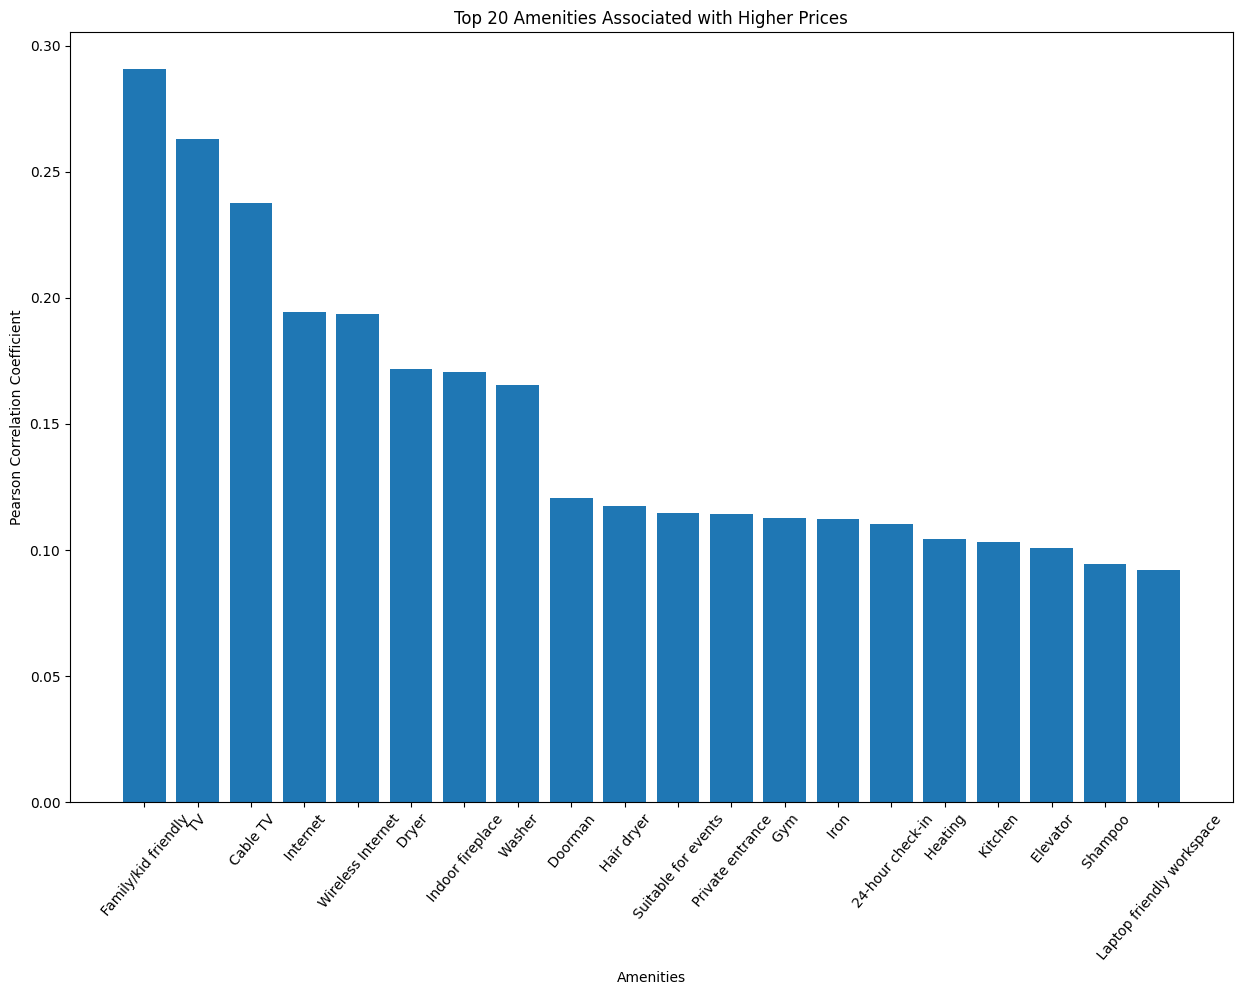

In [ ]:
top_amenities = dict(sorted_amenities[:20])

plt.figure(figsize=(15, 10))
plt.bar(top_amenities.keys(), top_amenities.values())
plt.xticks(rotation=50)
plt.xlabel('Amenities')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Top 20 Amenities Associated with Higher Prices')
plt.show()

# **6. Categorical Data Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[['property_type', 'room_type', 'bed_type', "cancellation_policy", "cleaning_fee", "city", "host_has_profile_pic", "host_identity_verified", "instant_bookable"]])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['property_type', 'room_type', 'bed_type', "cancellation_policy", "cleaning_fee", "city", "host_has_profile_pic", "host_identity_verified", "instant_bookable"]))

df = pd.concat([df, encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **7. Model Development and Training**

In [ ]:
# Droping Unwanted Columns
drop_columns = ['property_type', 'room_type', 'bed_type', "cancellation_policy", "cleaning_fee", "city", "host_has_profile_pic", "host_identity_verified", "instant_bookable", "id", "amenities", "description", "first_review", "host_since", "last_review", "name", "neighbourhood", "thumbnail_url"]

df.drop(columns=drop_columns, inplace=True)


In [ ]:
# Importing Libraries for Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, KFold

# Splitting the Data into Training and Testing Sets
X = df.drop(columns=['log_price'])
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print("Validation RMSE:", mean_squared_error(y_test, lr_pred, squared=False))
print("Validation R-squared:", r2_score(y_test, lr_pred))

Validation RMSE: 9887102196.792341
Validation R-squared: -1.902858900586487e+20


In [ ]:
# Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
print("Validation RMSE:", mean_squared_error(y_test, lasso_pred, squared=False))
print("Validation R-squared:", r2_score(y_test, lasso_pred))

Validation RMSE: 0.7167876381100637
Validation R-squared: -0.00011410677915502099


In [ ]:
# Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
print("Validation RMSE:", mean_squared_error(y_test, ridge_pred, squared=False))
print("Validation R-squared:", r2_score(y_test, ridge_pred))

Validation RMSE: 0.4511040538045366
Validation R-squared: 0.603884351679927


In [ ]:
# KNN Regressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
val_rmse = mean_squared_error(y_test, knn_pred, squared=False)
val_r2 = r2_score(y_test, knn_pred)
print("Validation RMSE:", val_rmse)
print("Validation R-squared:", val_r2)

Validation RMSE: 0.5242443691343232
Validation R-squared: 0.4650217959611441


In [ ]:
# Decison Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)
dtr_pred = dtr.predict(X_test_scaled)
print("Validation RMSE:", mean_squared_error(y_test, dtr_pred, squared=False))
print("Validation R-squared:", r2_score(y_test, dtr_pred))

Validation RMSE: 0.554042445304851
Validation R-squared: 0.4024770172733939


In [ ]:
# Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train_scaled, y_train)
rfr_pred = rfr.predict(X_test_scaled)
print("Validation RMSE:", mean_squared_error(y_test, rfr_pred, squared=False))
print("Validation R-squared:", r2_score(y_test, rfr_pred))

Validation RMSE: 0.38491811241075624
Validation R-squared: 0.7115933736589795


In [ ]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_scaled, y_train)
gbr_pred = gbr.predict(X_test_scaled)
print("Validation RMSE:", mean_squared_error(y_test, gbr_pred, squared=False))
print("Validation R-squared:", r2_score(y_test, gbr_pred))

Validation RMSE: 0.4070673947026426
Validation R-squared: 0.6774469336644227


# **8. Model Optimization and Validation**

In [ ]:
# Grid Search CV for Linear regression
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

lr = LinearRegression()


kf = KFold(n_splits=5, shuffle=True, random_state=42)
gs_lr = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)
gs_lr.fit(X_train_scaled, y_train)

In [ ]:
# Grid Search CV for Lasso
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}


lasso = Lasso()


kf = KFold(n_splits=5, shuffle=True, random_state=42)
gs_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)
gs_lasso.fit(X_train_scaled, y_train)

In [ ]:
# Grid Search CV for Ridge
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

ridge = Ridge()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

gs_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)
gs_ridge.fit(X_train_scaled, y_train)

In [ ]:
# Random Search CV for KNN Regressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rs_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_grid,
                                   n_iter=10, scoring='neg_mean_squared_error',
                                   cv=kf, random_state=42)


rs_knn.fit(X_train_scaled, y_train)

In [ ]:
# Random Search CV for Decision Tree Regressor
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dtr = DecisionTreeRegressor()


kf = KFold(n_splits=5, shuffle=True, random_state=42)

rs_dtr = RandomizedSearchCV(estimator=dtr, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=kf, random_state=42)
rs_dtr.fit(X_train_scaled, y_train)

In [ ]:
# Random Search CV for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfr = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rs_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=kf, random_state=42)
rs_rfr.fit(X_train_scaled, y_train)

In [ ]:
# Random Search CV for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

gbr = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rs_gbr = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=kf, random_state=42)
rs_gbr.fit(X_train_scaled, y_train)

# **9. Feature Importance and Model Insights**

In [ ]:
# Feature Importance of Random Forest regressor
feature_importance_rf = rs_rfr.feature_importances_

top_features_rf_indices = feature_importance_rf.argsort()[-10:][::-1]
top_features_rf = X.columns[top_features_rf_indices]

top_feature_importance_rf = feature_importance_rf[top_features_rf_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features_rf, top_feature_importance_rf)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance - Random Forest')
plt.show()

In [ ]:
# Feature Importance of Gradient Boosting Regressor
feature_importance_gb = rs_gbr.feature_importances_

top_features_gb_indices = feature_importance_gb.argsort()[-10:][::-1]
top_features_gb = X.columns[top_features_gb_indices]


top_feature_importance_gb = feature_importance_gb[top_features_gb_indices]


plt.figure(figsize=(10, 6))
plt.barh(top_features_gb, top_feature_importance_gb)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance - Gradient Boosting')
plt.show()

In [ ]:
!pip install shap

In [ ]:
# SHAP Values
import shap

# Random Forest
explainer_rf = shap.Explainer(rs_rfr)
shap_values_rf = explainer_rf(X)

# Gradient Boosting
explainer_gb = shap.Explainer(rs_gbr)
shap_values_gb = explainer_gb(X)


shap.summary_plot(shap_values_rf, X, plot_type='bar')
shap.summary_plot(shap_values_gb, X, plot_type='bar')

# **10. Predictive Performance Assessment**

In [ ]:
# Perfomance Evaluation of Linear Regression
best_lr = gs_lr.best_estimator_
best_lr_y_pred = best_lr.predict(X_test_scaled)

gs_lr_rmse = mean_squared_error(y_test, best_lr_y_pred, squared=False)
gs_lr_r2 = r2_score(y_test, best_lr_y_pred)

print("Best Model Hyperparameters:", gs_lr.best_params_)
print("Validation RMSE:", gs_lr_rmse)
print("Validation R-squared:", gs_lr_r2)

In [ ]:
# Perfomance Evaluation of Lasso
best_lasso = gs_lasso.best_estimator_
best_lasso_y_pred = best_lasso.predict(X_test_scaled)

gs_lasso_rmse = np.sqrt(mean_squared_error(y_test, best_lasso_y_pred))
gs_lasso_r2 = r2_score(y_test, best_lasso_y_pred)

print("Best Model Hyperparameters:", gs_lasso.best_params_)
print("Validation RMSE:", gs_lasso_rmse)
print("Validation R-squared:", gs_lasso_r2)

In [ ]:
# Perfomance Evaluation of Ridge
best_ridge = gs_ridge.best_estimator_
gs_ridge_y_pred = best_ridge.predict(X_test_scaled)


gs_ridge_rmse = mean_squared_error(y_test, gs_ridge_y_pred, squared=False)
gs_ridge_r2 = r2_score(y_test, gs_ridge_y_pred)

print("Best Model Hyperparameters:", gs_ridge.best_params_)
print("Validation RMSE:", gs_ridge_rmse)
print("Validation R-squared:", gs_ridge_r2)

In [ ]:
# Perfomance Evaluation of KNN Regressor
best_knn = rs_knn.best_estimator_
rs_knn_y_pred = best_knn.predict(X_test_scaled)

rs_knn_rmse = mean_squared_error(y_test, rs_knn_y_pred, squared=False)
rs_knn_r2 = r2_score(y_test, rs_knn_y_pred)

print("Best Model Hyperparameters:", rs_knn.best_params_)
print("Validation RMSE:", rs_knn_rmse)
print("Validation R-squared:", rs_knn_r2)

In [ ]:
# Perfomance Evaluation of Decision Tree Regressor
best_dtr = rs_dtr.best_estimator_
rs_dtr_y_pred = best_dtr.predict(X_test_scaled)

rs_dtr_rmse = mean_squared_error(y_test, rs_dtr_y_pred, squared=False)
rs_dtr_r2 = r2_score(y_test, rs_dtr_y_pred)

print("Best Model Hyperparameters:", rs_dtr.best_params_)
print("Validation RMSE:", rs_dtr_rmse)
print("Validation R-squared:", rs_dtr_r2)

In [ ]:
# Perfomance Evaluation of Random Forest Regressor
best_rfr = rs_rfr.best_estimator_
rs_rfr_y_pred = best_rfr.predict(X_test_scaled)

rs_rfr_rmse = mean_squared_error(y_test, rs_rfr_y_pred, squared=False)
rs_rfr_r2 = r2_score(y_test, rs_rfr_y_pred)

print("Best Model Hyperparameters:", rs_rfr.best_params_)
print("Validation RMSE:", rs_rfr_rmse)
print("Validation R-squared:", rs_rfr_r2)

In [ ]:
# Perfomance Evaluation of Gradient Boosting Regressor
best_gbr = rs_gbr.best_estimator_
rs_gbr_y_pred = best_gbr.predict(X_test_scaled)

rs_gbr_rmse = mean_squared_error(y_test, rs_gbr_y_pred, squared=False)
rs_gbr_r2 = r2_score(y_test, rs_gbr_y_pred)

print("Best Model Hyperparameters:", rs_gbr.best_params_)
print("Validation RMSE:", rs_gbr_rmse)
print("Validation R-squared:", rs_gbr_r2)